<a href="https://colab.research.google.com/github/TonySC1300/Simulacion1/blob/main/Soluci%C3%B3n_de_problemas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30] (minutos).
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 minutos

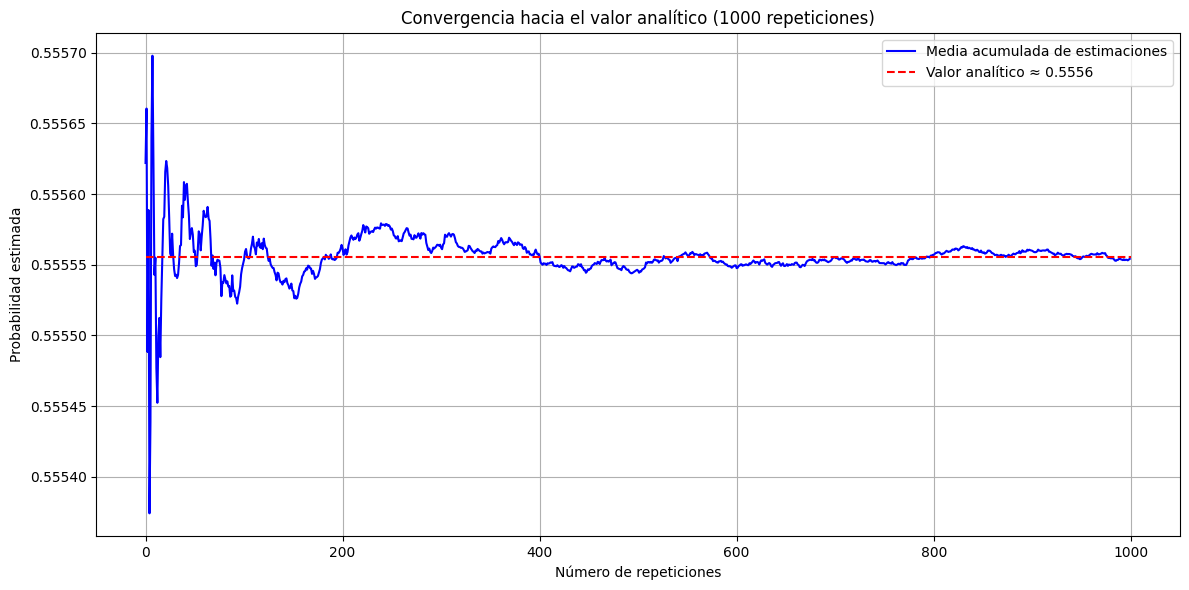


Promedio final de la estimación tras muchas repeticiones: 0.555554


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def simular_probabilidad_espera(N, tiempo_max, espera_max):
    """
    Simula una sola vez la probabilidad de espera ≤ espera_max minutos.
    """
    llegada1 = np.random.uniform(0, tiempo_max, N)
    llegada2 = np.random.uniform(0, tiempo_max, N)
    tiempo_espera = np.abs(llegada1 - llegada2)
    exitos = np.sum(tiempo_espera <= espera_max)
    return exitos / N

def repetir_simulaciones(num_repeticiones, N, tiempo_max, espera_max):
    """
    Repite muchas simulaciones y grafica cómo la media acumulada se estabiliza.
    """
    resultados = np.empty(num_repeticiones)

    # Hacemos todas las simulaciones
    for i in range(num_repeticiones):
        resultados[i] = simular_probabilidad_espera(N, tiempo_max, espera_max)

    # Valor analítico exacto
    valor_analitico = 1 - ((tiempo_max - espera_max) / tiempo_max) ** 2

    # Cálculo de media acumulada para mostrar convergencia
    medias_acumuladas = np.cumsum(resultados) / np.arange(1, num_repeticiones + 1)

    # Gráfica
    plt.figure(figsize=(12, 6))
    plt.plot(medias_acumuladas, label='Media acumulada de estimaciones', color='blue')
    plt.hlines(valor_analitico, 0, num_repeticiones, colors='red', linestyles='--', label=f'Valor analítico ≈ {valor_analitico:.4f}')
    plt.xlabel('Número de repeticiones')
    plt.ylabel('Probabilidad estimada')
    plt.title(f'Convergencia hacia el valor analítico ({num_repeticiones} repeticiones)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Último valor de la media acumulada = promedio final
    promedio_final = medias_acumuladas[-1]
    return promedio_final

# Ejecutamos con valores más altos para mayor precisión
promedio = repetir_simulaciones(
    num_repeticiones=1000,  # Más repeticiones para mejor convergencia
    N=1000000,                # Simulaciones por repetición
    tiempo_max=30,
    espera_max=10
)

print(f"\nPromedio final de la estimación tras muchas repeticiones: {promedio:.6f}")


Para la solucion analitica (que se utilizo en la grafica para comparar si se esta acercando ono nuestro valor simulado)

Consideremos las siguientes variables para el modelado del problema
Sea $X$ el minuto exacto respecto a la hora acordada en que llegó la persona $A$

Sea $Y$ el minuto exacto en que llegó la persona $B$

Cada una puede aparecer en cualquier instante del intervalo [0,30] min con la misma probabilidad y sin influirse mutuamente, de modo que

$$X,Y \sim U(0,30), i.i.d$$

Seguiremos esta notacion

Lo que nos interesa en cuestion es saber la probabilidad de que la espera mutua se como maximo $10min$, es decir (por definicion de probabilidad)

$$|X-Y|\leq10$$

Y sabemos por interpretacion geometrica que el espacio muestral representa todos los pares $(X,Y)$ posibles en un plano

El eje horizontal lleva $X\in [0,30]$

El eje vertical lleva $Y\in [0,30]$

Esto forma un cuadrado de la do $30$ y como estamos analizando tiempo las unidades seran minutos (lo propuso el problema)

Su area (que sirve como tamaño del universo de casos equiprobables) es
$$A_{total}=30 \times 30 = 900$$

Y debemos considerar la franja donde se cumple |X-Y| \leq 10

Esto lo podemos visualizar como las rectas $X=Y-10$ y $X=Y+10$ delimitan dos diagonales paralelas a la principal $X=Y$

El conjunto de puntos entre ellas es una diagonal ancha de $20 min$ (10 por arriba y 10 por abjo de la diagonal).

Esta banda, recortada dentro de un cuadrado, constituye la region "favorable".

Por otro lado la region desfavorable se encuentra:

Fuera de la banda diagonal quedan exactamente dos triángulos rectángulos isósceles en las esquinas opuestas:
  * Arriba-izquierda: vértices $(0,30), (0,20), (10,30)$

  * Abajo-derecha: vértices $(0,30), (0,20), (10,30)$

  Cada triangulo tiene catetos de $20 min$

Area de un triangulo
$$A=\frac {1}{2}\cdot (cateto)^2=\frac{1}{2}\cdot (20)^2=200$$

Por lo tanto tenemos que el area total guera de la banda es de:

$$A_{fuera}=2\cdot 200=400$$

Ahora con estos datos podemos calcular el area favorable

$$Area_{favorable}=Area_{total}-A_{fuera}=900-400=500$$

Ahora podemos hacer una conversion de area a probabilidad de la siguiente manera.

Debido a la uniformidad, la probanilidad es el cociente "Area favorable/Area total":
$$P(|X-Y|\leq 10) = \frac {Area_{favorable}}{Area_{total}}=frac{500}{900}=\frac{5}{9}\approx 0.5556$$

Ota forma de calcular esto es mediante integracion doble para conocer el area de una region de un plano, utilizaremos este metodo para hacer una comprobacion de que lo que se hizo previamente este correcto

$$P(|X-Y|\leq 10)=\frac{1}{30^2}\cdot \int \int_{|x-y|\leq 10} dxdy$$
$$=\frac{1}{900} \left[ \int _{y=0} ^{10} \int _{x=0} ^{y+10}dxdy + \int_{y=10} ^{20} \int_{x=y-10} ^{y+10} dxdy + \int_{y=20} ^{30} \int_{x=y-10} ^{30} dxdy \right]$$

$$\frac{1}{900} \left[ [10y]_{0} ^{10}+ [20y]_{10} ^{20} + [(40-y)y]_{20} ^{30} \right]$$

$$\frac{500}{900}=\frac{5}{9}$$
Confirmando el resultado geometrico

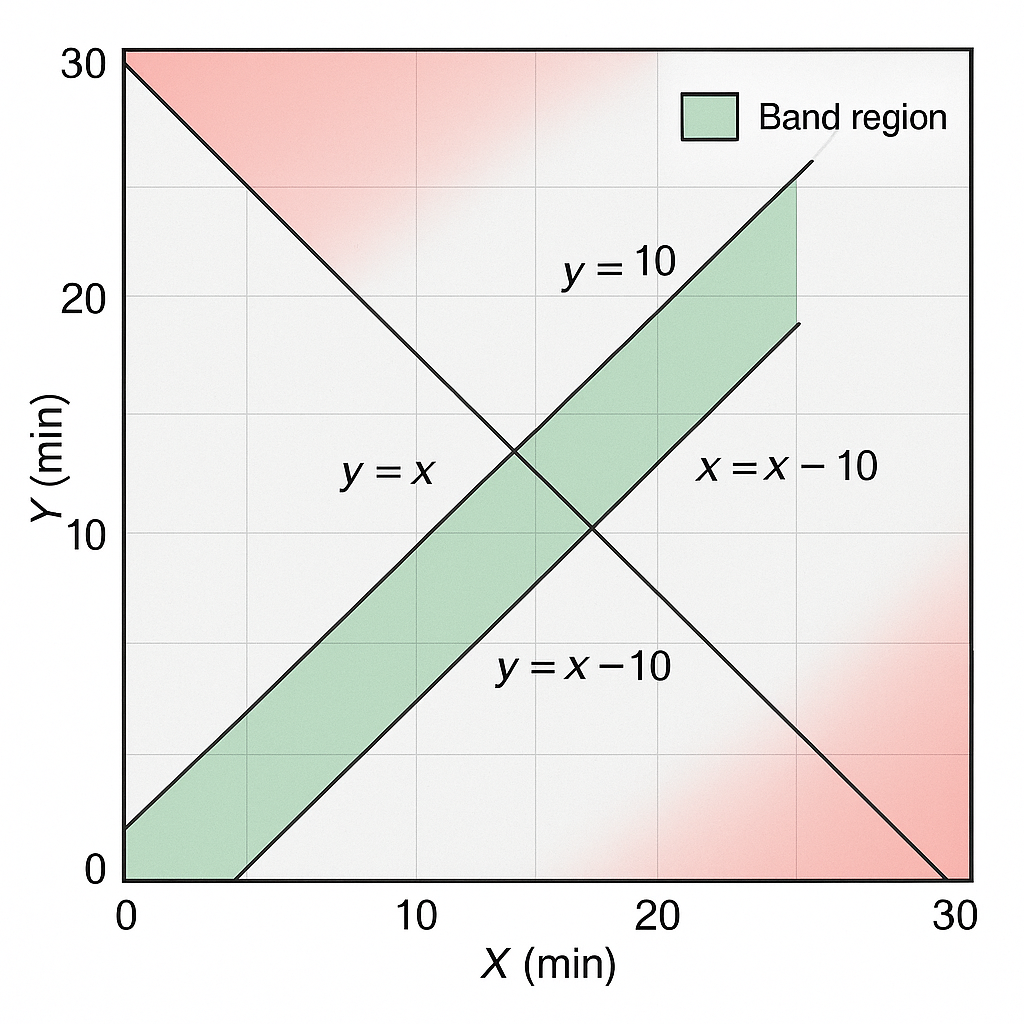